# Agrupamiento de Promedios K en Machine Learning

También conocido como **K-means clustering** o simplemente **K-means**, es un algoritmo identifica la cantidad de promedios que queremos (`K` = la cantidad específica de promedios que elijamos) y luego de identificar esos promedios, agrupa todos los casos que existen en un `DataFrame` alrededor de esos promedios en agrupaciones llamadas `clusters`.

En el siguiente ejemplo, K-means ha encontrado las mejores ubicaciones para posicionar los promedios para cada cluster. Dichas ubicaciones son denominadas `centroides`.

![EjemploKMeansClustering.png](./assets/EjemploKMeansClustering.png)

K-means realiza los siguientes pasos:

1. **Inicialización:** Se elige la cantidad de K que serán los centroides iniciales, los cuales son ubicados aleatoriamente.

2. **Asignación:** Cada dato (punto) es asignado al centroide más cercano.

3. **Actualización:** Se va recalculando el promedio de todos los puntos asignados a determinado cluster y se reubica el centroide.

4. **Iteración:** Los pasos 2 y 3 se repiten hasta que la posición de los centroides ya no cambia significativamente.

El resultado es que los datos se dividen en grupos donde cada punto pertenece al grupo con el centroide

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# Supongamos un dataset hecho de un array de números aleatorios
np.random.seed(42)

**DATO:** La función `seed()` de `np.random` establece que la "semilla" del generador de números aleatorios va a ser un número fijo (en este caso 42).

**¿Qué es una semilla?**

Es un valor inicial a partir del cual se comienza la generación de secuencias de números aleatorios. Es sumamente útil para asegurarse replicabilidad de resultados ("de que tú y yo tengamos los mismos números aleatorios que van a partir de la misma semilla y podamos ver los mismos resultados", según Fede).

In [3]:
# Generar el dataset (matriz de 100 filas y 2 columnas)
data: np.ndarray = np.random.rand(100, 2)
data

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [5]:
# Crear un modelo kmeans y entrenarlo con los datos
kmeans: KMeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [6]:
# Ver los centroides
centroides: np.ndarray = kmeans.cluster_centers_
centroides

array([[0.77630221, 0.71893453],
       [0.30496924, 0.21311702],
       [0.12006068, 0.90489563],
       [0.7920458 , 0.22728231],
       [0.22739621, 0.59428412]])

In [7]:
# Ver las etiquetas de los datos
etiquetas: np.ndarray = kmeans.labels_
etiquetas

array([2, 0, 1, 2, 0, 2, 3, 1, 4, 1, 3, 1, 4, 4, 3, 3, 2, 0, 1, 3, 4, 2,
       4, 4, 1, 0, 0, 0, 1, 1, 1, 3, 4, 2, 2, 3, 2, 0, 3, 1, 0, 1, 1, 0,
       3, 4, 0, 0, 1, 1, 4, 4, 3, 4, 1, 1, 0, 0, 3, 0, 0, 1, 4, 0, 4, 1,
       1, 3, 0, 2, 3, 1, 1, 0, 1, 3, 4, 3, 0, 4, 4, 0, 2, 1, 4, 3, 1, 3,
       3, 3, 1, 0, 4, 0, 1, 2, 0, 1, 0, 0])

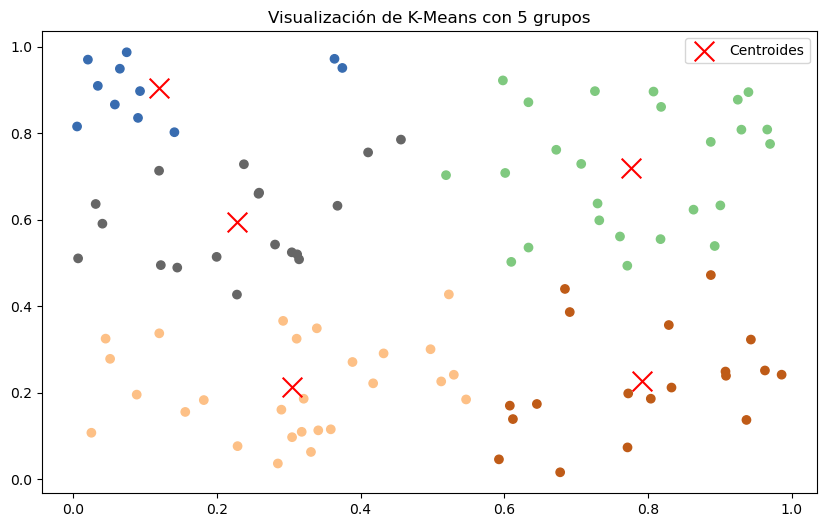

In [15]:
# Plotear los datos
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=etiquetas, cmap='Accent', marker='o')
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c='red',
    marker='x',
    s=200,
    label='Centroides'
)
plt.title('Visualización de K-Means con 5 grupos')
plt.legend()
plt.show()

### Remaking el mismo gráfico inicial de los pingüinos

In [19]:
df: pd.DataFrame = sns.load_dataset('penguins')
df.dropna(inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
data: pd.DataFrame = df[['bill_length_mm', 'bill_depth_mm']]
data

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6
...,...,...
338,47.2,13.7
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


In [21]:
kmeans: KMeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

c:\Users\Francisco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [22]:
centroides: np.ndarray = kmeans.cluster_centers_
etiquetas: np.ndarray = kmeans.labels_

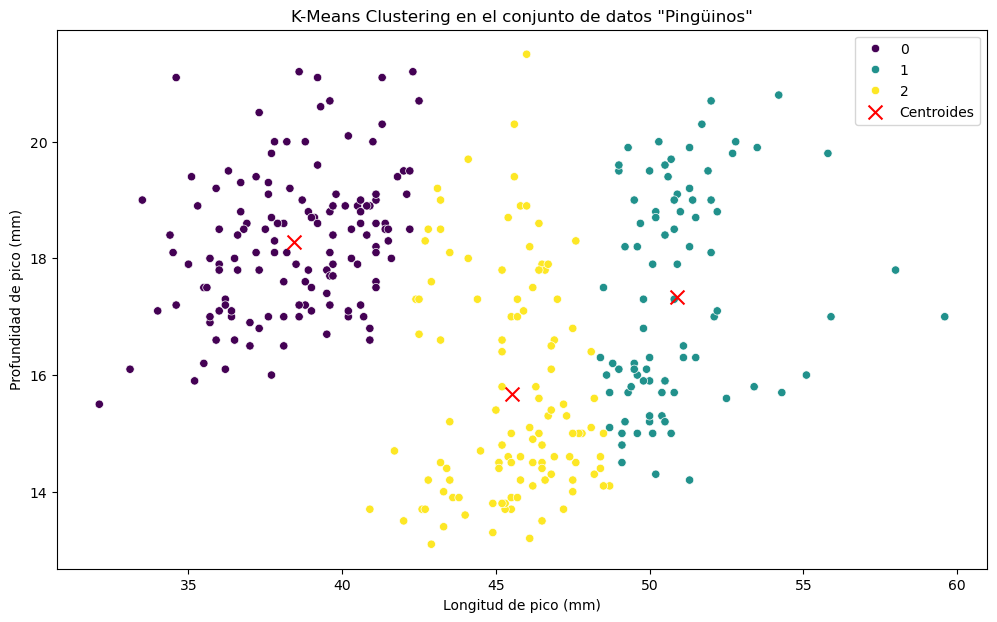

In [24]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue=etiquetas,
    palette='viridis'
)
plt.scatter(
    centroides[:, 0],
    centroides[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Centroides'
)
plt.title('K-Means Clustering en el conjunto de datos "Pingüinos"')
plt.legend()
plt.xlabel('Longitud de pico (mm)')
plt.ylabel('Profundidad de pico (mm)')
plt.show()